In [162]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [163]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
6148,8990-YOZLV,Female,0,No,No,69,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Mailed check,66.90,4577.9,No
1672,4737-AQCPU,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),72.10,5016.65,No
6141,5385-SUIRI,Male,1,Yes,No,52,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.20,5568.35,Yes
3175,7395-IGJOS,Male,1,Yes,No,17,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),81.50,1329.2,Yes


In [164]:
# customer id is not useful for predictions

df.drop(columns='customerID',axis = 'columns',inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [165]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [166]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [167]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')

In [168]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [169]:
df1 = df[~df.TotalCharges.isnull()]

In [170]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [171]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


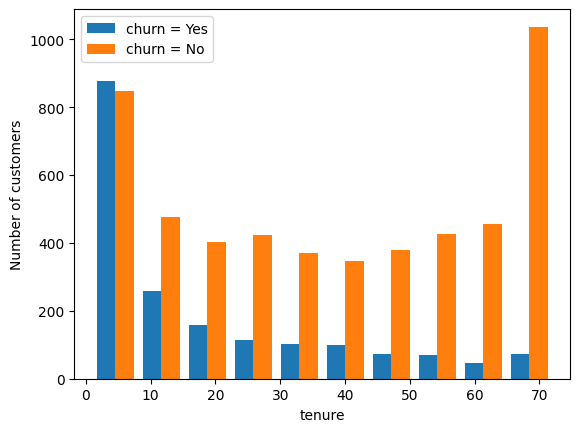

In [172]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.hist([tenure_churn_yes,tenure_churn_no],label=["churn = Yes","churn = No"])
plt.legend()

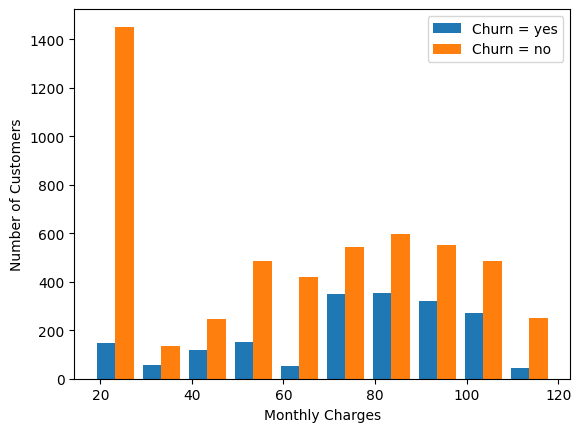

In [173]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")

plt.hist([mc_churn_yes,mc_churn_no],label=["Churn = yes","Churn = no"])
plt.legend()

In [174]:
def print_cols(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

print_cols(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [175]:
df1 = df1.replace('No internet service' , 'No')
df1 = df1.replace('No phone service' , 'No')

In [176]:
print_cols(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [177]:
df1.replace({'Yes' : 1,'No':0},inplace=True)
df1.replace({'Female' : 1,'Male':0},inplace=True)
print_cols(df1)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


C:\Users\SANEH\AppData\Local\Temp\ipykernel_22336\1772696516.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'Yes' : 1,'No':0},inplace=True)
C:\Users\SANEH\AppData\Local\Temp\ipykernel_22336\1772696516.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'Female' : 1,'Male':0},inplace=True)


In [178]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [179]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype='int64')
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3061,0,1,0,0,23,1,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
3189,1,0,1,1,15,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
271,0,0,1,0,57,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
5251,1,1,0,0,5,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [180]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df2[['tenure','MonthlyCharges','TotalCharges']])


In [181]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3323,1,0,0,1,0.380282,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
66,0,0,1,0,0.647887,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
5909,1,0,0,0,0.718310,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [251]:
x = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [252]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [237]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=5)

In [238]:
import tensorflow as tf
from tensorflow import keras

In [239]:
model = keras.Sequential([
    keras.layers.Dense(18,input_shape=(26,),activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

c:\Users\SANEH\Desktop\innohacks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [240]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [241]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10


198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.6779 - loss: 0.5923
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.7881 - loss: 0.4371
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.7850 - loss: 0.4330
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8009 - loss: 0.4220
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8094 - loss: 0.4114
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.8068 - loss: 0.4167
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8043 - loss: 0.4087
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8091 - loss: 0.4065
Epoch 9/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8106 - loss: 0.4181
Epoch 10/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.8056 - loss: 0.4046


In [242]:
model.evaluate(x_test,y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7965 - loss: 0.4284 


[0.4308454394340515, 0.7982954382896423]

The accuracy of our model is low. So let's check precision, recall, f1 scores and confusion matrix

In [243]:
from sklearn.metrics import classification_report,confusion_matrix

In [253]:
arr = model.predict(x_test)
y_pred = []
for val in arr:
    if val>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


In [254]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       514
           1       0.65      0.54      0.59       190

    accuracy                           0.80       704
   macro avg       0.75      0.72      0.73       704
weighted avg       0.79      0.80      0.79       704



We can see here that the precision , recall and f1-score is less for the data points where churn is yes.
Let's check if our dataset is imbalanced.

In [255]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

As one can see clearly that the database is imbalanced. So we will use upsampling here.
Upsampling creates artificial data points of the minority class. After upsampling, the counts of both labels are almost same. This procedure prevents the model from inclining towards the majority class.

In [256]:
import imblearn

In [304]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
x_res, y_res = sm.fit_resample(x,y)

In [329]:
x_res.shape

(6138, 26)

In [330]:
y_res.shape


(6138,)

In [331]:
y_res.value_counts()

Churn
1    3375
0    2763
Name: count, dtype: int64

In [493]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [494]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\SANEH\Desktop\innohacks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [495]:
model.fit(x_train,y_train,epochs = 15)

Epoch 1/15


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.8386 - loss: 0.3691
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.9152 - loss: 0.2085
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.9239 - loss: 0.1935
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9158 - loss: 0.1889
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.9364 - loss: 0.1620
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.9294 - loss: 0.1713
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.9327 - loss: 0.1568
Epoch 8/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9378 - loss: 0.1458
Epoch 9/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.9336 - loss: 0.1472
Epoch 10/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.9407 - loss: 0.1420
Epoch 11/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9476 - loss: 0.1343
Epoch 12/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 

In [496]:
model.evaluate(x_test,y_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9503 - loss: 0.1276 


[0.12883085012435913, 0.9543973803520203]